In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

In [2]:
main = pd.read_csv('./Health-r.csv', low_memory=False)
main.loc[(main.riearn != 0) & (main.ripena == 0), 'retired'] = 0
main.loc[(main.riearn != 0) & (main.ripena != 0), 'retired'] = 0
main.loc[(main.riearn == 0) & (main.ripena != 0), 'retired'] = 100

In [3]:
ids = list(main.hhidpn.unique())
retired_rows = []
preretired_rows = []

for id in ids:
    person_data = main[main.hhidpn == id]
    ret = list(person_data.retired)
    age = list(person_data.ragey_b)

    if len(person_data.retired.unique()) != 2:
        continue
    
    ind = ret.index(100)
    retired_rows.append(person_data[person_data.index_wave == list(person_data.index_wave)[ind]])

    if ind != 0:
        preretired_rows.append(person_data[person_data.index_wave == list(person_data.index_wave)[ind - 1]])

In [4]:
main.loc[(main.riearn != 0) & (main.ripena == 0), 'retired'] = 0
main.loc[(main.riearn != 0) & (main.ripena != 0), 'retired'] = 50
main.loc[(main.riearn == 0) & (main.ripena != 0), 'retired'] = 100

In [5]:
changed = pd.concat(retired_rows, ignore_index=True)

In [6]:
missing_part = main[main.rhltc.isin(['.p', '.m', '.d', '.r'])]
ids_to_drop = missing_part.hhidpn.unique()

main = main.drop(main[main.hhidpn.isin(ids_to_drop)].index)
main.rhltc = pd.to_numeric(main.rhltc)

In [7]:
missing_part = changed[changed.rhlthlm.isin(['.y', '.r', '.m', '.w', '.d'])]
ids_to_drop = missing_part.hhidpn.unique()

changed = changed.drop(changed[changed.hhidpn.isin(ids_to_drop)].index)
changed.rhlthlm = pd.to_numeric(changed.rhlthlm)

In [8]:
missing_part = changed[changed.ragey_b.isin(['.r', '.d', '.m'])]
ids_to_drop = missing_part.hhidpn.unique()

changed = changed.drop(changed[changed.hhidpn.isin(ids_to_drop)].index)
changed.ragey_b = pd.to_numeric(changed.ragey_b)

In [9]:
missing_part = changed[changed.rhosp.isin(['.r', '.d', '.m'])]
ids_to_drop = missing_part.hhidpn.unique()

tmp = changed.drop(changed[changed.hhidpn.isin(ids_to_drop)].index)
tmp.rhosp = pd.to_numeric(tmp.rhosp)

In [10]:
all = set(changed.hhidpn)
ok = set()
per = 0

In [11]:
t = set(list(changed[changed.rhlthlm == 1].hhidpn.unique()))
ok |= t
print(len(t) / len(all) * 100, len(ok) / len(all) * 100)

40.36681667657298 40.36681667657298


In [12]:
t = set(list(tmp[tmp.rhosp == 1].hhidpn.unique()))
ok |= t
print(len(t) / len(all) * 100, len(ok) / len(all) * 100)

26.848942854716825 50.83637598709348


In [13]:
rate = set()

prechanged = pd.concat(preretired_rows, ignore_index=True)
ids = list(set(prechanged.hhidpn.unique()) & set(changed.hhidpn.unique()))

for id in ids:
    person_data = prechanged[prechanged.hhidpn == id]
    ret = list(person_data.retired)
    rhltc = list(person_data.rhltc)

    if rhltc[0] in ['5']:
        rate.add(id)

In [14]:
ok |= rate
print(len(rate) / len(all) * 100, len(ok) / len(all) * 100)

# 54.96306359853953

2.6152670459369958 51.082618663496646


In [15]:
len(ok) / len(all)

0.5108261866349665

In [16]:
res1 = [list(changed[changed.hhidpn == i].ragey_b)[0] for i in ok]
res2 = [list(changed[changed.hhidpn == i].ragey_b)[0] for i in all]

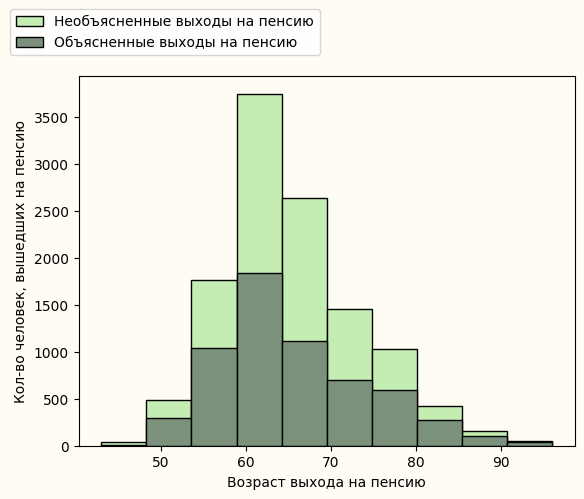

In [18]:
plt.figure(facecolor='#FFFCF4')
plt.axes().set_facecolor("#FFFCF4")

plt.hist(res2, color='#C4EDB3', edgecolor = "black")
plt.hist(res1, color="#7b917b", edgecolor = "black")
plt.ylabel('Кол-во человек, вышедших на пенсию')
plt.xlabel('Возраст выхода на пенсию')

labels= ["Необъясненные выходы на пенсию","Объясненные выходы на пенсию"]
plt.legend(labels, prop={'size': 10}, bbox_to_anchor=(0.5,1.2))

In [19]:
age_ok = list(changed[changed.hhidpn.isin(ok)].ragey_b)
age_all = list(changed[changed.hhidpn.isin(all)].ragey_b)

In [20]:
xages = list(set(age_all))
sages = []

bars_step = 3
bars = []

for i in range(43, 94, bars_step):
    t1 = 0
    t2 = 0

    for j in range(i, i + bars_step):
        t1 += age_ok.count(i)
        t2 += age_all.count(i)

    if t2 != 0:
        sages.append(t1 / t2)
    else:
        sages.append(1)

    bars.append(i)

aages = [1 - i for i in sages]

In [21]:
sages = np.array(sages)
aages = np.array(aages)

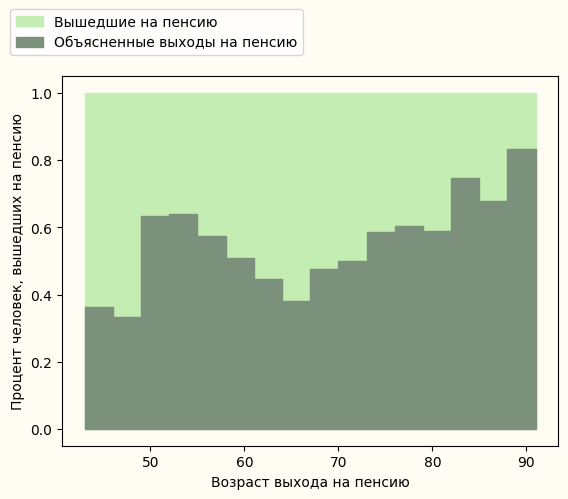

In [22]:
plt.figure(facecolor='#FFFCF4')
plt.axes().set_facecolor("#FFFCF4")
plt.fill_between(bars, [1 for i in range(len(bars))], step="pre", alpha=1, color='#C4EDB3')
plt.fill_between(bars, sages, step="pre", alpha=1, color="#7b917b")

plt.ylabel('Процент человек, вышедших на пенсию')
plt.xlabel('Возраст выхода на пенсию')

labels= ["Вышедшие на пенсию","Объясненные выходы на пенсию"]
plt.legend(labels, prop={'size': 10}, bbox_to_anchor=(0.5,1.2))


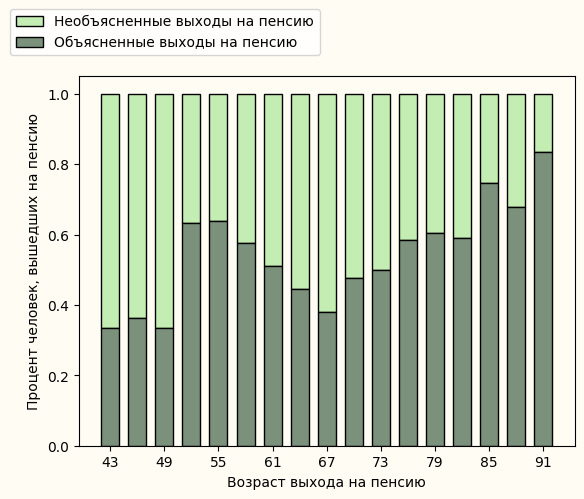

In [23]:
plt.figure(facecolor='#FFFCF4')
plt.axes().set_facecolor("#FFFCF4")
plt.bar(bars, aages, bottom=sages, width=2, color='#C4EDB3', edgecolor = "black")
plt.bar(bars, sages, width=2, color="#7b917b", edgecolor = "black")

plt.ylabel('Процент человек, вышедших на пенсию')
plt.xlabel('Возраст выхода на пенсию')

plt.xticks(np.arange(min(bars), max(bars)+1, 6))

labels= ["Необъясненные выходы на пенсию", "Объясненные выходы на пенсию"]
plt.legend(labels, prop={'size': 10}, bbox_to_anchor=(0.5,1.2))

In [24]:
main = pd.read_csv('./Health-r.csv', low_memory=False)
main = main.drop(main[main.hhidpn.isin(ok)].index)
main.to_csv('./Health-unp.csv')